    
# Linear Model on North Carolina Crime Rate Dataset (Part II)

## **Objective:**

To use insights from EDA to develop a suitable **linear model with crmrte as the dependent variable** and explain the various aspects of the model.

## Actionable Observations from EDA

1) The density and urban variable has highest correlation with crime rate.

2) But, density and urban variable seems to be highly correlated, which is obvious, because urban areas are densely populated. Hence, there is a high chance of multicollinearity between density and urban features. We wll use linear regression to sort out this question.

3) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.

4) A combination of density and urban (or west or central) can help aid crime rate prediction. 

5) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the weekly wages would be higher in urban areas.

6) Some of the "wage features" are positively correlated, as the wage increase/ decrease in one domain would certainly influence the other.

7) wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation with each other.

8) There are 6 strongly correlated values with Crime Rate: crmrte, density, urban, wfed, taxpc, wtrd.



## Load Input Data

In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load haberman.csv into a pandas dataFrame.
# Survival data of patients who had undergone surgery for breast cancer
crimeData = pd.read_csv("crime_v2.csv")
    
# (Q) how many data-points and features?
print (crimeData.shape)

# See the input data.
crimeData.head(5)
# Identified the columns have header information.


(91, 25)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,87,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,87,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,87,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,87,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,87,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312469,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


# Data Cleaning

In [34]:
# Data Cleaning based on EDA 
# Last row with special character fixed in input data.

# Removing the wage outlier row based on observation from EDA
crimeData = crimeData[crimeData.county != 185] # very high wser & prob of conviction
crimeData = crimeData[crimeData.county != 115] # prob of arrest > 1

# Removing rows with probability of arrest and conviction > 1
crimeData = crimeData[crimeData['prbarr'] < 1]
crimeData = crimeData[crimeData['prbconv'] < 1]

# dropping the Year column as it doesnt help in prediction
crimeData = crimeData.drop('year', axis=1)

# (Q) how many after deletion?
print (crimeData.shape)

(81, 24)


# Evaluate Observations using Linear Regression Model

Lets evaluate the above observations by building Linear Regression Models, as it helps to understand the relation between variables better.

## Creating Model with Most Correlated Feature

In [35]:
import statsmodels.api as sm

y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
X = crimeData['density']

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

density_pvalue = model.pvalues['density']

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     87.19
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           2.14e-14
Time:                        13:03:28   Log-Likelihood:                 237.36
No. Observations:                  81   AIC:                            -470.7
Df Residuals:                      79   BIC:                            -465.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.002     11.084      0.000       0.018       0.026
density        0.0086      0.001      9.337      0.000       0.007       0.010
==============================================================================
Omnibus:                       32.235   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.363
Skew:                           1.531   Prob(JB):                     1.29e-13
Kurtosis:                       5.866   Cond. No.                         3.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) As the p-value of density is 0 (small), the changes in crime rate has got close relation with changes in density.

b) R-squared value is found to be 0.525 with only density as predictor variable. This means that 52.5% variability of crime rate is explained by density feature.

c) Co-effient estimate of 0.0086 indicates one value increase of density would cause 0.0086 value increase in crime rate.

## Creating Model with Top 2 Correlated Features

In [36]:
y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
# X = crimeData[('density', 'urban')]
X = crimeData[['density', 'urban']]

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

density_pvalue_upd = model.pvalues['density']
print('Difference in P-Value = ' + str(density_pvalue_upd - density_pvalue))

# Print out the statistics
model.summary()


Difference in P-Value = 6.84341392607547e-06


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           2.15e-13
Time:                        13:03:28   Log-Likelihood:                 237.53
No. Observations:                  81   AIC:                            -469.1
Df Residuals:                      78   BIC:                            -461.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0230      0.002      9.832      0.000       0.018       0.028
density        0.0079      0.002      4.824      0.000       0.005       0.011
urban          0.0049      0.009      0.572      0.569      -0.012       0.022
==============================================================================
Omnibus:                       31.953   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.195
Skew:                           1.525   Prob(JB):                     2.31e-13
Kurtosis:                       5.818   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) **R-squared value is found to be slightly higher (0.527)** when the variable, 'urban' is coupled with density as predictor variables. But, R Squared always goes up when you add more variables regardless of whether the added variable help in prediction or not.

b)  Adjusted R Squared, penalizes for adding more variables. Thus, it can go down when you add variables that don’t contribute. Here note that, **Adjusted R-squared value has gone down from 0.519 to 0.514. Also, the AIC value is increased from -470 to -469** (the smaller the AIC value, the better the model is).

c) It has been noticed that the **p-value of 'density' feature has been increased slightly.** 

Thus, **the model has become more less reliable to explain crime rate**, because the feature 'urban' doesnt contribute to prediction. The confusion about the correlation between 'urban' and 'density' variable during EDA step, has been sorted out.

**Note:** If we add variables that are not meaningful as predictor, then it **would cause 'Overfitting'.** Then, prediction model would perform great with the training data but not with the real world data.

# Multiple Linear Regression: Model with all Features

In [37]:
y = crimeData['crmrte']
X = crimeData.drop('crmrte', axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()
# density_pvalue = model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     21.51
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           2.78e-20
Time:                        13:03:28   Log-Likelihood:                 299.18
No. Observations:                  81   AIC:                            -550.4
Df Residuals:                      57   BIC:                            -492.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      0.018      0.639      0.526      -0.025       0.048
county      1.444e-06   1.51e-05      0.096      0.924   -2.88e-05    3.17e-05
prbarr        -0.0527      0.010     -5.192      0.000      -0.073      -0.032
prbconv       -0.0078      0.006     -1.276      0.207      -0.020       0.004
prbpris        0.0095      0.012      0.797      0.429      -0.014       0.033
avgsen        -0.0008      0.000     -1.953      0.056      -0.002    2.02e-05
polpc         10.6768      2.592      4.120      0.000       5.487      15.866
density        0.0052      0.001      4.440      0.000       0.003       0.008
taxpc          0.0002      0.000      1.937      0.058   -6.77e-06       0.000
west          -0.0042      0.004     -1.092      0.279      -0.012       0.003
central       -0.0059      0.003     -2.278      0.027      -0.011      -0.001
urban          0.0019      0.005      0.347      0.730      -0.009       0.013
pctmin80       0.0003   8.64e-05      3.328      0.002       0.000       0.000
wcon        2.913e-05   2.63e-05      1.109      0.272   -2.35e-05    8.17e-05
wtuc         1.46e-05   1.47e-05      0.991      0.326   -1.49e-05    4.41e-05
wtrd        5.157e-05   4.17e-05      1.238      0.221   -3.19e-05       0.000
wfir       -5.154e-05   2.76e-05     -1.869      0.067      -0.000    3.67e-06
wser       -8.387e-05   3.03e-05     -2.765      0.008      -0.000   -2.31e-05
wmfg       -3.029e-06   1.34e-05     -0.226      0.822   -2.99e-05    2.38e-05
wfed        3.762e-05   2.48e-05      1.516      0.135   -1.21e-05    8.73e-05
wsta       -4.931e-05    2.4e-05     -2.055      0.045   -9.74e-05   -1.25e-06
wloc        4.789e-05   4.44e-05      1.079      0.285    -4.1e-05       0.000
mix           -0.0229      0.014     -1.649      0.105      -0.051       0.005
pctymle        0.1437      0.044      3.263      0.002       0.056       0.232
==============================================================================
Omnibus:                        6.426   Durbin-Watson:                   2.543
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.775
Skew:                           0.623   Prob(JB):                       0.0557
Kurtosis:                       3.396   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Removing features from all-feature Model

In [38]:
y = crimeData['crmrte']

# Feature 'urban' is found to be worsen the model as per above analysis.
# Intuitively county shouldnt contribute prediction and also p value is high.
X = crimeData.drop(['crmrte', 'urban', 'county'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     24.33
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           1.21e-21
Time:                        13:03:28   Log-Likelihood:                 299.09
No. Observations:                  81   AIC:                            -554.2
Df Residuals:                      59   BIC:                            -501.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102      0.017      0.590      0.558      -0.024       0.045
prbarr        -0.0527      0.010     -5.277      0.000      -0.073      -0.033
prbconv       -0.0078      0.006     -1.297      0.200      -0.020       0.004
prbpris        0.0097      0.012      0.827      0.411      -0.014       0.033
avgsen        -0.0008      0.000     -2.010      0.049      -0.002   -3.34e-06
polpc         10.6261      2.534      4.193      0.000       5.555      15.697
density        0.0055      0.001      6.820      0.000       0.004       0.007
taxpc          0.0002      0.000      2.019      0.048    1.85e-06       0.000
west          -0.0041      0.004     -1.086      0.282      -0.012       0.003
central       -0.0060      0.003     -2.389      0.020      -0.011      -0.001
pctmin80       0.0003   8.41e-05      3.465      0.001       0.000       0.000
wcon        2.999e-05   2.57e-05      1.165      0.249   -2.15e-05    8.15e-05
wtuc        1.432e-05    1.4e-05      1.023      0.310   -1.37e-05    4.23e-05
wtrd        5.279e-05   4.06e-05      1.302      0.198   -2.84e-05       0.000
wfir       -5.231e-05    2.7e-05     -1.940      0.057      -0.000    1.65e-06
wser       -8.355e-05   2.93e-05     -2.847      0.006      -0.000   -2.48e-05
wmfg       -2.147e-06    1.3e-05     -0.166      0.869   -2.81e-05    2.38e-05
wfed        3.682e-05   2.43e-05      1.514      0.135   -1.18e-05    8.55e-05
wsta       -4.695e-05   2.26e-05     -2.078      0.042   -9.22e-05   -1.74e-06
wloc        4.692e-05   4.35e-05      1.078      0.285   -4.02e-05       0.000
mix           -0.0225      0.014     -1.658      0.103      -0.050       0.005
pctymle        0.1435      0.043      3.350      0.001       0.058       0.229
==============================================================================
Omnibus:                        6.743   Durbin-Watson:                   2.540
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.101
Skew:                           0.637   Prob(JB):                       0.0473
Kurtosis:                       3.431   Cond. No.                     3.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interim Observations:**

a) **Adj. R-squared improved** from 0.825 in all-feature model to 0.830, after removal of 2 features 'urban', 'county'.

b) **AIC value decreased** from -591.3 in all-feature model to -595.2, after removal of 2 features 'urban', 'county'.

Thus, **we have a better model than the all-feature model.** We will try to remove more features and analyze the model indicators.

In [39]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     31.92
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           2.16e-24
Time:                        13:03:28   Log-Likelihood:                 296.14
No. Observations:                  81   AIC:                            -558.3
Df Residuals:                      64   BIC:                            -517.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0217      0.014      1.506      0.137      -0.007       0.050
prbarr        -0.0567      0.010     -5.937      0.000      -0.076      -0.038
prbconv       -0.0091      0.006     -1.540      0.128      -0.021       0.003
avgsen        -0.0007      0.000     -1.921      0.059      -0.001    2.75e-05
polpc          9.7437      2.349      4.148      0.000       5.052      14.436
density        0.0055      0.001      6.894      0.000       0.004       0.007
taxpc          0.0002   8.99e-05      2.709      0.009     6.4e-05       0.000
central       -0.0039      0.002     -2.069      0.043      -0.008      -0.000
pctmin80       0.0004   5.52e-05      6.623      0.000       0.000       0.000
wcon          4.2e-05   2.34e-05      1.794      0.077   -4.76e-06    8.88e-05
wtrd        6.533e-05   3.81e-05      1.714      0.091   -1.08e-05       0.000
wfir       -5.357e-05   2.62e-05     -2.045      0.045      -0.000   -1.25e-06
wser       -7.778e-05   2.79e-05     -2.786      0.007      -0.000    -2.2e-05
wfed        4.184e-05   2.33e-05      1.798      0.077   -4.66e-06    8.83e-05
wsta       -4.689e-05   2.16e-05     -2.172      0.034      -9e-05   -3.75e-06
mix           -0.0226      0.013     -1.729      0.089      -0.049       0.004
pctymle        0.1463      0.040      3.626      0.001       0.066       0.227
==============================================================================
Omnibus:                        3.217   Durbin-Watson:                   2.602
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.725
Skew:                           0.446   Prob(JB):                        0.256
Kurtosis:                       3.111   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interim Observations:**

a) **Adj. R-squared of the above model with 8 features dropped is better** than the all-feature model.

b) **AIC value of the above model is better** than the all-feature model.

**Thus, we have a better model than the all-feature model** by removing more features such as 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'. We will try to remove even more features with p > 0.05 and evaluate using RMSE. 

# Model Evaluation Using Cross Validation & RMSE

We will test the change in RMSE value when the features with p > 0.05 are removed. The features with p > 0.05 are prbconv, mix, wfed, wtrd, wcon & avgsen. We will also check the RMSE values for the features removed in the previous model.

In [40]:
from sklearn.cross_validation import train_test_split

def calculateRMSE(X, y, feature='None'):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Instantiate and fit the model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)

    RMSE = str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # RMSE
    print("RMSE with " + feature + " removed = " + RMSE)
    return RMSE

RMSE with None removed = 0.011598193103785095
RMSE with wmfg removed = 0.01136661900197904
RMSE with prbpris removed = 0.011775293806203662
RMSE with wloc removed = 0.011190102338212366
RMSE with west removed = 0.011516684556469887
RMSE with wtuc removed = 0.010807252151383978
RMSE with prbconv removed = 0.011772727414832405
RMSE with mix removed = 0.012039673462990959
RMSE with wfed removed = 0.011975451306453819
RMSE with wtrd removed = 0.010915720261174582
RMSE with wcon removed = 0.011764476830686559
RMSE with avgsen removed = 0.011416545616172611
[7.940343974245835e-05, 7.876000652725602e-05, 7.73186075780776e-05, 7.441591573020534e-05, 8.065155538140224e-05, 7.818118813054687e-05, 7.669942254568409e-05, 8.196396299951215e-05, 7.781572609574409e-05, 7.58126759095425e-05, 7.60465693124211e-05, 8.132511037612161e-05]


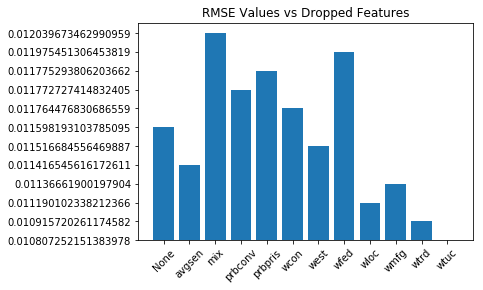

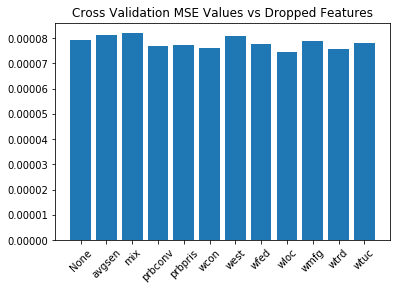

In [65]:
from sklearn.cross_validation import cross_val_score

rmseVals = []
cv_scores = []
droppedFeatures = []

# Features are dropped based on p-value, R-Squared and AIC figures.
features2Drop = ['crmrte', 'urban', 'county']

y = crimeData['crmrte']
X = crimeData.drop(features2Drop, axis=1)

rmseVals.append(calculateRMSE(X, y))
droppedFeatures.append('None')
scores = cross_val_score(LinearRegression(), 
                         X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores.append(-1*scores.mean())

# 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc' are dropped in the previous model
features2Test = ['wmfg', 'prbpris', 'wloc', 'west', 'wtuc', 
                 'prbconv', 'mix', 'wfed', 'wtrd', 'wcon', 'avgsen']

for feature in features2Test:
    features2Drop.append(feature)
    X = crimeData.drop(features2Drop, axis=1)
    features2Drop.remove(feature)
    rmseVals.append(calculateRMSE(X, y, feature))
    droppedFeatures.append(feature)

    scores = cross_val_score(LinearRegression(), 
                             X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-1*scores.mean())
        
# print(droppedFeatures)
# print(cv_scores)

plt.bar(droppedFeatures, rmseVals)
plt.title('RMSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()

plt.bar(droppedFeatures, cv_scores)
plt.title('Cross Validation MSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()


From the bar chart, the RMSE values performs better than 'None' when wtuc, wtrd, wloc, west, wmfg and avgsen are removed. Thus, in addition to the previous model, **wtrd & avgsen features are removed.** But the R-squared and AIC figures degrade when both the features are removed. Since wtrd has a higher p value, **we will remove wtrd in our model.**

The lowest cross validation MSE is for wloc, wtrd, prbconv and wcon. Thus, in addition to the previous exclusions, prbconv & wcon also can be dropped. But removal of either feature would increase the RMSE value as per the above plot. Thus, we will remove only wtrd in our model.

# OLS Regression Characteristic of Final Model

In [69]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           1.49e-24
Time:                        14:37:02   Log-Likelihood:                 294.32
No. Observations:                  81   AIC:                            -556.6
Df Residuals:                      65   BIC:                            -518.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.014      1.934      0.057      -0.001       0.056
prbarr        -0.0565      0.010     -5.831      0.000      -0.076      -0.037
prbconv       -0.0114      0.006     -1.945      0.056      -0.023       0.000
avgsen        -0.0007      0.000     -1.786      0.079      -0.001    7.72e-05
polpc          8.7877      2.315      3.796      0.000       4.164      13.412
density        0.0057      0.001      7.203      0.000       0.004       0.007
taxpc          0.0003    9.1e-05      2.805      0.007    7.35e-05       0.000
central       -0.0037      0.002     -1.910      0.061      -0.007       0.000
pctmin80       0.0004   5.59e-05      6.430      0.000       0.000       0.000
wcon        4.928e-05   2.34e-05      2.110      0.039    2.63e-06    9.59e-05
wfir       -3.698e-05   2.47e-05     -1.497      0.139   -8.63e-05    1.23e-05
wser       -7.719e-05   2.83e-05     -2.725      0.008      -0.000   -2.06e-05
wfed        5.195e-05   2.29e-05      2.273      0.026    6.31e-06    9.76e-05
wsta       -5.331e-05   2.16e-05     -2.470      0.016   -9.64e-05   -1.02e-05
mix           -0.0208      0.013     -1.575      0.120      -0.047       0.006
pctymle        0.1400      0.041      3.433      0.001       0.059       0.221
==============================================================================
Omnibus:                        7.452   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.918
Skew:                           0.607   Prob(JB):                       0.0315
Kurtosis:                       3.759   Cond. No.                     2.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing the Model on Input Data

In [ ]:
# To calculate Linear Regression, do plotting and calculate error

# Importing the statistics module
from statistics import mean
from statistics import median

# used to format headings 
bold = '\033[1m'
end = '\033[0m'

def linearReg(x_train, y_train, x_test, y_test):
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices: $Y_i$")
    plt.ylabel("Predicted Prices: $\hat{Y}_i$")
    plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    
    # calculate MAE, MSE, RMSE
    print("Mean Absolute Error (MAE) = " + str(
                metrics.mean_absolute_error(y_test, y_pred)))
    print("Median Squared Error (MSE) = " + str(
                metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE) = " + str(
                np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
    print("Explained Variance = " + str(metrics.explained_variance_score(y_test, y_pred)))

    # Calculating the error
    delta_y = y_test - y_pred;
    print("Median Absolute Error = " + str(median(abs(delta_y))))

In [ ]:
from sklearn.cross_validation import train_test_split

y = crimeData['crmrte']
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd', 'wcon'], axis=1)

# create training and testing data: 70/ 30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Train Data Shape:')
print(X_train.shape, y_train.shape)
print('Test Data Shape:')
print(X_test.shape, y_test.shape)

linearReg(X_train, y_train, X_test, y_test)


# **Conclusion**

a) **The Actual vs Predicted plot is linear. This signifies the prediction is working fine.** The input data set is limited. With more data, the plot could be more linear.

b) As an improvement, we can combine the boolean features: west, central and urban into a single feature with categorical values 1, 2 & 3. Such a feature can help aid the prediction.

c) If there is a chance to add features, then it might be helpful to get 'unemployment rate'. 